In [2]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [42]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [96]:
data_path = ["../data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv("face_augmentated_9.csv")
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,161 161 163 167 170 170 169 169 167 163 155 14...,False
2,0,31 38 43 40 33 40 42 37 34 40 47 49 52 68 82 7...,False
3,0,47 44 48 49 44 44 51 55 60 64 76 95 98 100 137...,False
4,0,20 30 20 13 32 38 41 44 47 46 43 40 41 61 87 9...,False


In [88]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(241643, 3)

In [103]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [104]:
X,y = data_X_y(data)

print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)

1.0
(282598, 48, 48, 1)
0.0 1.0
(282598,)


In [105]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [106]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(282598, 48, 48, 1)
(282598, 2304)


In [107]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

#X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
#X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

#print(y_rus.value_counts())
print(y_ros.value_counts())
#print(y_smote.value_counts())

0    72139
1    72139
2    72139
3    72139
4    72139
5    72139
Name: emotion, dtype: int64


In [50]:
# Checks the unique rows in the array for smote, ros & rus
print(len(X_smote))
print(len(np.unique(X_smote, axis=0)))
print(len(X_ros))
print(len(np.unique(X_ros, axis=0)))
print(len(X_rus))
print(len(np.unique(X_rus, axis=0)))

43284
41663
43284
27092
19020
18177


In [108]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

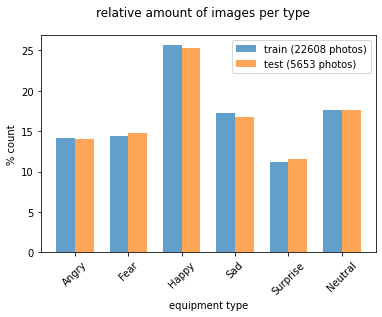

In [52]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

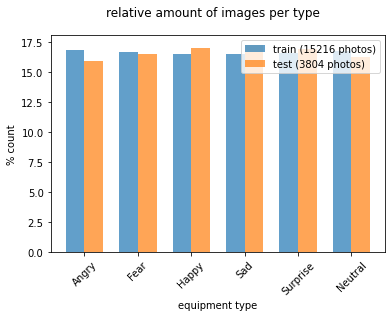

In [53]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_rus, loc='left')
plot_train_test_distribution(y_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_rus)), 
    'test ({0} photos)'.format(len(y_test_rus))
]);

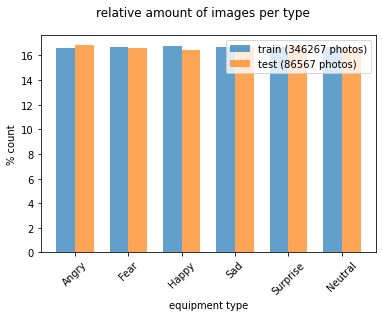

In [109]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_ros, loc='left')
plot_train_test_distribution(y_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_ros)), 
    'test ({0} photos)'.format(len(y_test_ros))
]);

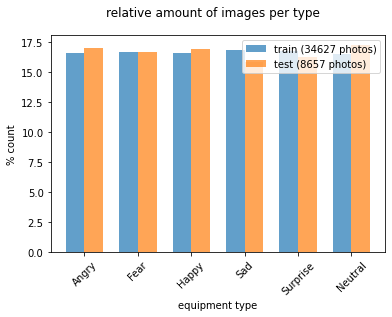

In [55]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

In [ ]:
# These are the X & y that can be used for fitting a ML model
X_train, X_test, y_train, y_test
X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
X_train_smote, X_test_smote, y_train_smote, y_test_smote

In [16]:
# pip install python-resize-image
from resizeimage import resizeimage
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image


In [47]:
import joblib
loaded_ml = joblib.load("RandomForest-Smote-Accuracy67.54.joblib")
loaded_ml2 = joblib.load("RandomForest-Augmented9-Oversampled-Accuracy83.66.joblib")
loaded_ml3 = joblib.load("RandomForest-Augmented9-Oversampled-Accuracy80.81.joblib")
loaded_ml4 = joblib.load("DecisionTree-Oversampled-Accuracy65.48.joblib")
loaded_ml5 = joblib.load("DecisionTree-Smote-Accuracy44.85.joblib")
loaded_ml6 = joblib.load("RandomForest-Augmented-Oversampled-Accuracy73.99.joblib")
loaded_ml7 = joblib.load("RandomForest-Oversampled-Accuracy73.99.joblib")

allModels = [loaded_ml, loaded_ml2, loaded_ml3, loaded_ml4, loaded_ml5, loaded_ml6, loaded_ml7]

In [ ]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
CLASS_NAMES = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
test_image = import_test_sample("C:/Users/Xander/Pictures/Camera Roll/WIN_20210531_12_11_18_Pro (2).jpg")

for model in allModels:
    y_pred = model.predict_proba(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES)
    print(y_pred)

# Kan aan het verschil in versies liggen dat het niet voor mij werkt.

In [64]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='micro'),
                      'recall': recall_score(y_true, y_pred, average='micro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Normal dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train, y_train)

y_train_pred = modelDTC.predict(X_train)
y_test_pred = modelDTC.predict(X_test)

accuracy_train = measure_error(y_train, y_train_pred, 'train')
accuracy_test = measure_error(y_test, y_test_pred, 'test')

print(pd.concat([accuracy_train, accuracy_test], axis=1))

              train      test
accuracy   0.998894  0.314523
precision  0.998894  0.314523
recall     0.998894  0.314523
f1         0.998894  0.314523


In [37]:
#Undersampled dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_rus, y_train_rus)

y_train_pred = modelDTC.predict(X_train_rus)
y_test_pred = modelDTC.predict(X_test_rus)

accuracy_rus_train = measure_error(y_train_rus, y_train_pred, 'train')
accuracy_rus_test = measure_error(y_test_rus, y_test_pred, 'test')

print(pd.concat([accuracy_rus_train, accuracy_rus_test], axis=1))

              train     test
accuracy   0.998883  0.29469
precision  0.998883  0.29469
recall     0.998883  0.29469
f1         0.998883  0.29469


In [38]:
#Oversampled dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_ros, y_train_ros)

y_train_pred = modelDTC.predict(X_train_ros)
y_test_pred = modelDTC.predict(X_test_ros)

accuracy_ros_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_ros_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_ros_train, accuracy_ros_test], axis=1))

              train      test
accuracy   0.998845  0.664433
precision  0.998845  0.664433
recall     0.998845  0.664433
f1         0.998845  0.664433


In [39]:
#Smote dataset
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=32).fit(X_train_smote, y_train_smote)

y_train_pred = modelDTC.predict(X_train_smote)
y_test_pred = modelDTC.predict(X_test_smote)

accuracy_smote_train = measure_error(y_train_smote, y_train_pred, 'train')
accuracy_smote_test = measure_error(y_test_smote, y_test_pred, 'test')

print(pd.concat([accuracy_smote_train, accuracy_smote_test], axis=1))

              train      test
accuracy   0.998903  0.451889
precision  0.998903  0.451889
recall     0.998903  0.451889
f1         0.998903  0.451889


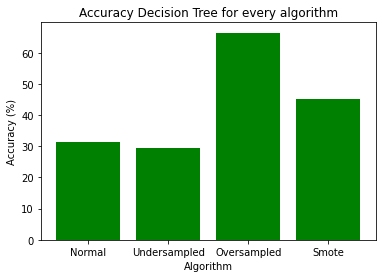

In [50]:
x = ['Normal', 'Undersampled', 'Oversampled', 'Smote']
y = [accuracy_test['accuracy'], accuracy_rus_test['accuracy'], accuracy_ros_test['accuracy'], accuracy_smote_test['accuracy']]

y = [y*100 for y in y]

plt.bar(x, y, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Decision Tree for every algorithm")

plt.xticks(x, x)

plt.show()

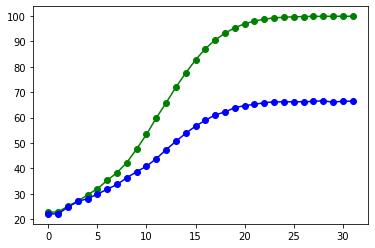

In [29]:
trainAccuracy = []
testAccuracy = []

for i in range(1,33):
    modelDTC = DecisionTreeClassifier(random_state=42, max_depth=i).fit(X_train_ros, y_train_ros)
    
    y_train_pred = modelDTC.predict(X_train_ros)
    y_test_pred = modelDTC.predict(X_test_ros)

    trainAccuracy.append(measure_error(y_train_ros, y_train_pred, 'train')['accuracy']*100)
    testAccuracy.append(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100)

plt.plot(trainAccuracy, color='green', marker='o')
plt.plot(testAccuracy, color='blue', marker='o')

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)

y_train_pred = modelRFC.predict(X_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)

accuracy_rfc_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_rfc_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_rfc_train, accuracy_rfc_test], axis=1))

              train      test
accuracy   0.998787  0.741481
precision  0.998787  0.741481
recall     0.998787  0.741481
f1         0.998787  0.741481


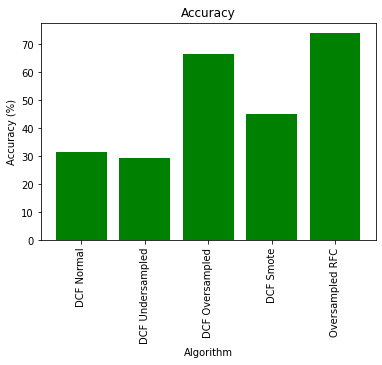

In [49]:
x = ['DCF Normal', 'DCF Undersampled', 'DCF Oversampled', 'DCF Smote', 'Oversampled RFC']
y = [accuracy_test['accuracy'], accuracy_rus_test['accuracy'], accuracy_ros_test['accuracy'], accuracy_smote_test['accuracy'], accuracy_rfc_test['accuracy']]

y = [y*100 for y in y]

plt.bar(x, y, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.xticks(x, x, rotation=90)

plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(modelRFC, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [70]:
y_train_pred = bestF.predict(X_train_ros)
y_test_pred = bestF.predict(X_test_ros)

accuracy_rfc_train = measure_error(y_train_ros, y_train_pred, 'train')
accuracy_rfc_test = measure_error(y_test_ros, y_test_pred, 'test')

print(pd.concat([accuracy_rfc_train, accuracy_rfc_test], axis=1))

              train      test
accuracy   0.998787  0.759501
precision  0.998787  0.759501
recall     0.998787  0.759501
f1         0.998787  0.759501


In [82]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}


In [31]:
#Export Oversampled
import joblib
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['RandomForest-Oversampled-Accuracy73.99.joblib']

In [35]:
#Export Smote
modelRFC = RandomForestClassifier(random_state=42, max_depth=23).fit(X_train_smote, y_train_smote)
y_test_pred = modelRFC.predict(X_test_smote)
accuracy_rfc_test = round(measure_error(y_test_smote, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Smote-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['RandomForest-Smote-Accuracy67.54.joblib']

In [36]:
#Decision Tree
import joblib
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=23).fit(X_train_ros, y_train_ros)
y_test_pred = modelDTC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'DecisionTree-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['DecisionTree-Oversampled-Accuracy65.48.joblib']

In [37]:
modelDTC = DecisionTreeClassifier(random_state=42, max_depth=23).fit(X_train_smote, y_train_smote)
y_test_pred = modelDTC.predict(X_test_smote)
accuracy_rfc_test = round(measure_error(y_test_smote, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'DecisionTree-Smote-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['DecisionTree-Smote-Accuracy44.85.joblib']

In [67]:
#Augemented 9 images

In [111]:
#Export Oversampled
modelRFC = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=1200).fit(X_train_ros, y_train_ros)
y_test_pred = modelRFC.predict(X_test_ros)
accuracy_rfc_test = round(measure_error(y_test_ros, y_test_pred, 'test')['accuracy']*100,2)
joblib.dump(modelRFC, 'RandomForest-Augmented9-Oversampled-Accuracy' + str(accuracy_rfc_test) + '.joblib') 

['RandomForest-Augmented9-Oversampled-Accuracy83.66.joblib']

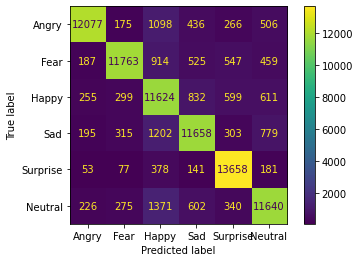

In [119]:
from sklearn.metrics import plot_confusion_matrix
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

plot_confusion_matrix(loaded_model, X_test_ros, y_test_ros, display_labels = CLASS_NAMES_WITHOUT_DISGUST)


In [122]:
accuracy_rfc_test = measure_error(y_test_ros, y_test_pred, 'test')
print(accuracy_rfc_test)

0.8365774486813682
accuracy     0.836577
precision    0.836577
recall       0.836577
f1           0.836577
Name: test, dtype: float64


In [3]:
#pip install opencv-python
import cv2
import time

def click_and_crop(event, x, y, flags, param):
    global refPt, cropping
    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being
    # performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
        # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
        # draw a rectangle around the region of interest
        #cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        #cv2.imshow("my webcam", image)
        
def clickPredict(event, x, y, flags, param):
    global loaded_ml
    global CLASS_NAMES
    
    test_image = cv2.resize(roi, [48,48])
    test_image = Image.fromarray(test_image)
    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)

    clear_output(wait=True)
    #for model in allModels:
    y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred[0]])

In [14]:
import joblib
from IPython.display import clear_output, display
from resizeimage import resizeimage
from PIL import Image, ImageOps
from collections import Counter
import time

#loaded_ml = joblib.load("RandomForest-Smote-Accuracy67.54.joblib")
#loaded_ml2 = joblib.load("RandomForest-Augmented9-Oversampled-Accuracy83.66.joblib")
#loaded_ml3 = joblib.load("RandomForest-Augmented9-Oversampled-Accuracy80.81.joblib")
#loaded_ml4 = joblib.load("DecisionTree-Oversampled-Accuracy65.48.joblib")
#loaded_ml5 = joblib.load("DecisionTree-Smote-Accuracy44.85.joblib")
#loaded_ml6 = joblib.load("RandomForest-Augmented-Oversampled-Accuracy73.99.joblib")
#loaded_ml7 = joblib.load("RandomForest-Oversampled-Accuracy73.99.joblib")

allModels = [loaded_ml, loaded_ml2, loaded_ml3, loaded_ml4, loaded_ml5, loaded_ml6, loaded_ml7]
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

refPt = []
cam = cv2.VideoCapture(1)
if cam.isOpened():  # try to get the first frame
    print('Cam is working')
else:
    print("Cam is not working")

output = ["","","","","","",""]

while True:
    ret_val, img = cam.read()
    if ret_val == False:
        cam.release()
    if cv2.waitKey(1) == 27: 
        break  # esc to quit
    if len(refPt) == 2:
        roi = img[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
        cv2.imshow("ROI", roi)
        
        test_image = cv2.resize(roi, [48,48])
        test_image = Image.fromarray(test_image)
        test_image = ImageOps.grayscale(test_image)

        test_image = np.array(test_image)
        test_image = test_image.astype("int32")
        test_image = test_image/255.0
        test_image = test_image.reshape(48, 48, 1)
        
        clear_output(wait=True)
        x = 0
        for model in allModels:
            y_pred = model.predict(np.reshape(test_image, (1, 2304)))
            output[x] = CLASS_NAMES[y_pred[0]]
            x+=1
        mostPredicted = [item for item in Counter(output).most_common()]
        print (str(mostPredicted))
    else:
        cv2.imshow('my webcam', img)
        cv2.setMouseCallback("my webcam", click_and_crop)


cv2.destroyAllWindows()

[('Sad', 5), ('Happy', 2)]


KeyboardInterrupt: 